In [2]:
# If you want, you can use the following function to efficiently compute pairwise distances.
# Read the docstring to learn how to use it.
from scipy.spatial.distance import cdist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
class KMeans(object):
    
    def __init__(self, k=3, n_inits=10, random_seed=None):
        '''KMeans clustering algorithm.
        
        Parameters
        ----------
        k: number of clusters
        n_intis: number of initializations
        '''
        # Parameters
        self.k = k
        self.n_inits = n_inits
        self.random_seed = random_seed
        
        # The following attributes will be computed through execution of the
        # KMeans algorithm in the fit method.
        self.centroids_ = None
        self.labels_ = None
        self.cost_ = None
        self.num_iterations_ = 0
    
    
    def fit(self, X):
        '''Clusters the dataset X into k clusters.
        '''                
        
        result_n = []
        
        entries, features = X.shape
        
        #implement random seed
        np.random.seed(self.random_seed)
        
        #loop: 
        # 1. calculate distance to data and predict data according to it
        # 2. if cost functiuon not converged then calculate mean of predicted data and update centroids
        # 3. repeat until cost function is low
        cost_old = None
        
        loops = []
        all_costs = np.array([])
        inits_data = []
        
        for i in range(self.n_inits):
            #create random centroids from minimum to maximum value of data set
            self.centroids_ = np.amin(X) + (np.amax(X)-np.amin(X)) * np.random.rand(self.k, features)
            self.centroids_init = self.centroids_
            
            while(True):
                #calculate new labels, new costs
                self.labels_ = self.predict(X)
                centroids_old = self.centroids_
                self.cost_ = self.cost_function(X)

                #for each centroid, calculate new mean of data belonging to that centroid
                for k in range(self.k):
                    new_ = np.mean(X[np.where(np.isclose(self.labels_,k))], axis = 0)
                    #ignore if there is no data for centroid
                    if(~np.any(np.isnan(new_) == True)):
                        self.centroids_[k] = new_

                #if old cost difference to new cost is lower than margin, break the loop and stop
                if(cost_old is not None):
                    if np.abs(self.cost_ - cost_old) < 0.00001:
                        break

                #set new cost to old cost for next iteration
                cost_old = self.cost_
                self.num_iterations_ += 1
            
            all_costs = np.append(all_costs, self.cost_)
            inits_data.append([self.centroids_, self.num_iterations_])

        self.cost_ = np.min(all_costs)
        self.centroids_, self.num_iterations_ = inits_data[np.where(np.isclose(all_costs, self.cost_))[0][-1]]
        
        return self.centroids_

  
    def cost_function(self, X):
        '''Computes the KMeans cost function for a given dataset X.
        '''
        #calculate distances
        #code is deprecated
        '''distances = np.array([cdist(X, np.array([point]), 'euclidean') for point in self.centroids_])
        minimums = []
        for i in range(len(distances[0])):
            #get distance to closest centroid per entry
            minimum = distances[:,i].min(axis=0)
            minimums.append(minimum)
        return np.sum(np.array(minimums)**2)'''
    
        distances = cdist(X, self.centroids_ , metric='euclidean')
        minimums = np.min(distances, axis = 1)
        return np.sum(minimums**2)
        
    
    def predict(self, X):
        '''Assigns each data point in X to the closest cluster.
        
        Can only be used after the clustering algorithm has been executed.
        '''
        
        #calculate distance to each centroid
        #code is deprecated
        '''distances = np.array([cdist(X, np.array([point]), 'euclidean') for point in self.centroids_])
        
        predictions = []
        indexes = []
        for i in range(len(distances[0])):
            #get distance to closest centroid per entry
            minimum = distances[:,i].min(axis=0)
            #get index of that centroid
            indexes.append(np.where(np.isclose(distances[:,i], minimum))[0][0])
        
        return indexes'''
        
        #much easier with argmin lol
        distances = cdist(X, self.centroids_, metric='euclidean')
        labels = np.argmin(distances, axis=1)
        return labels
    
        #??:
        #initialize centroids
        
        #optimization


[14.528  6.269  5.382  7.344  6.42   9.798  8.881  9.069  9.162  7.269
 13.826 13.32  11.702 11.419 12.99   8.123 14.401  8.723 10.84  12.49
 10.199 10.35  14.177  9.029 14.934 26.01  27.961 30.64  25.794 25.336
 22.494 30.83  21.015 27.464 26.566 27.377 24.549 28.636 28.192 20.059
 27.279 22.921 26.208 27.309 25.69  27.951 22.4   25.051 21.024 22.948
 58.23  48.415 58.566 45.412 59.894 58.779 54.519 48.    44.19  52.417
 42.029 52.597 57.501 50.149 57.668 45.03  48.523 54.337 47.871 40.927
 53.771 40.109 49.843 55.646 46.355]


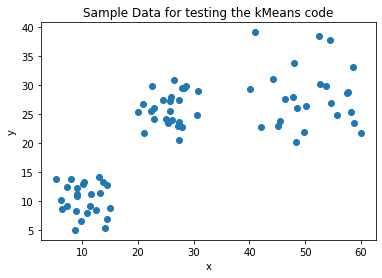

In [3]:
x1 = np.round(5 + np.random.uniform(0, 10, size = 25),3)
y1 = np.round(5 + np.random.uniform(0, 10, size = 25),3)

x2 = np.round(20 + np.random.uniform(0, 11, size = 25),3)
y2 = np.round(20 + np.random.uniform(0, 11, size = 25),3)

x3 = np.round(50 + np.random.uniform(0, 20, size = 25),3) - 10
y3 = np.round(50 + np.random.uniform(0, 20, size = 25),3) - 30

sample_data = np.append(np.column_stack([x1,y1]), np.column_stack([x2,y2]), axis = 0)
sample_data = np.append(sample_data, np.column_stack([x3,y3]), axis = 0)

print(sample_data[0:,0])
plt.scatter(sample_data[0:,0], sample_data[0:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sample Data for testing the kMeans code")
plt.show()

C:\Users\bruno\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\bruno\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


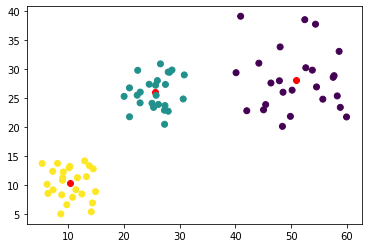

In [4]:
kmeans_tester = KMeans(3, 10)
kmeans_tester.fit(sample_data)
kmeans_tester.centroids_

plt.scatter(kmeans_tester.centroids_[:,0], kmeans_tester.centroids_[:,1], c = "red")
plt.scatter(sample_data[0:,0], sample_data[0:,1], c=kmeans_tester.predict(sample_data))

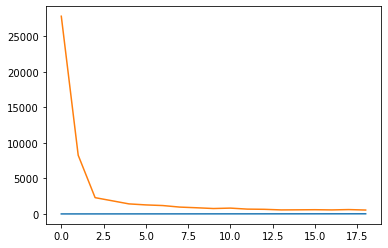

In [5]:
# by reducing the number of features with pca we improve the performance of K-means
#pca = PCA(len(relevant_features)).fit(x,y)
#scores_pca = pca.transform(x)

wcss = []
for i in range(1, 20):
    kmeansi = KMeans(i, 10, 42)
    kmeansi.fit(sample_data)
    wcss.append((i, kmeansi.cost_))
    
kmeans_scores = pd.DataFrame(wcss, columns=['n_clusters', 'wcss'])

plt.plot(kmeans_scores)
#fig.add_vline(x=3, line_color='red', line_dash='dot')
plt.show()